In [2]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
from cfg.convert_cfg_to_yaml import save_myyaml_from_mycfg
from Data import Data_eval
from include.loss import pixel_weighted_cross_entropy
import model_eval

import matplotlib_functions

matplotlib_functions.setMatplotlibParam()
plt.viridis()

dir_res = "/cerea_raid/users/dumontj/dev/coco2/dl/res"

<Figure size 1920x1440 with 0 Axes>

In [17]:
# Berlin
name_case = "models/seg_2km_64_ber_no2"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Ber/2d_valid_dataset.nc"

In [28]:
# Lippendorf
name_case = "models/seg_2km_64_lip_no2"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/2d_valid_dataset.nc"

In [76]:
# Patnow
name_case = "/cerea_raid/users/dumontj/dev/coco2/dl/res/segmentation/seg_pat_no_no2"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Pat/2d_train_dataset.nc"

In [3]:
# Turow
name_case = "/cerea_raid/users/dumontj/dev/coco2/dl/res/segmentation/seg_tur_no_no2"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Tur/2d_train_dataset.nc"

In [4]:
data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (6289, 64, 64, 1)


/profils_cerea/dumontj/mambaforge/envs/gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:324: UserWarning: models.Unet_backboned is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(
2023-03-28 10:27:42.006249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 10:27:42.605977: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14451 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [110]:
#data.x.eval[:,:,44:,-1] = data.x.eval[:,:, :20,-1]

In [5]:
wbce = model_eval.get_wbce_model_on_data(model, data)
print(np.mean(wbce))

2023-03-28 10:27:52.955651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-28 10:27:53.585863: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 7s 19ms/step
0.2203867


In [6]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

197/197 [==============================] - 3s 14ms/step
0.82738894


nwbce: 1.6895782
idx 5878
origin: smart_2km_Tur_64
time: 2015-11-29T22:00:00.000000000
emiss: [6.998516 7.363199 7.436205 7.436259 7.582174 7.800948]
nwbce: 0.7498405
idx 834
origin: smart_2km_Tur_64
time: 2015-02-16T18:00:00.000000000
emiss: [11.58993 11.92428 12.25856 12.59279 12.70414 12.81559]
nwbce: 0.77267396
idx 4779
origin: smart_2km_Tur_64
time: 2015-09-29T03:00:00.000000000
emiss: [6.225796 6.31342  6.31339  6.927142 7.716263 8.417729]


<Figure size 1920x1440 with 0 Axes>

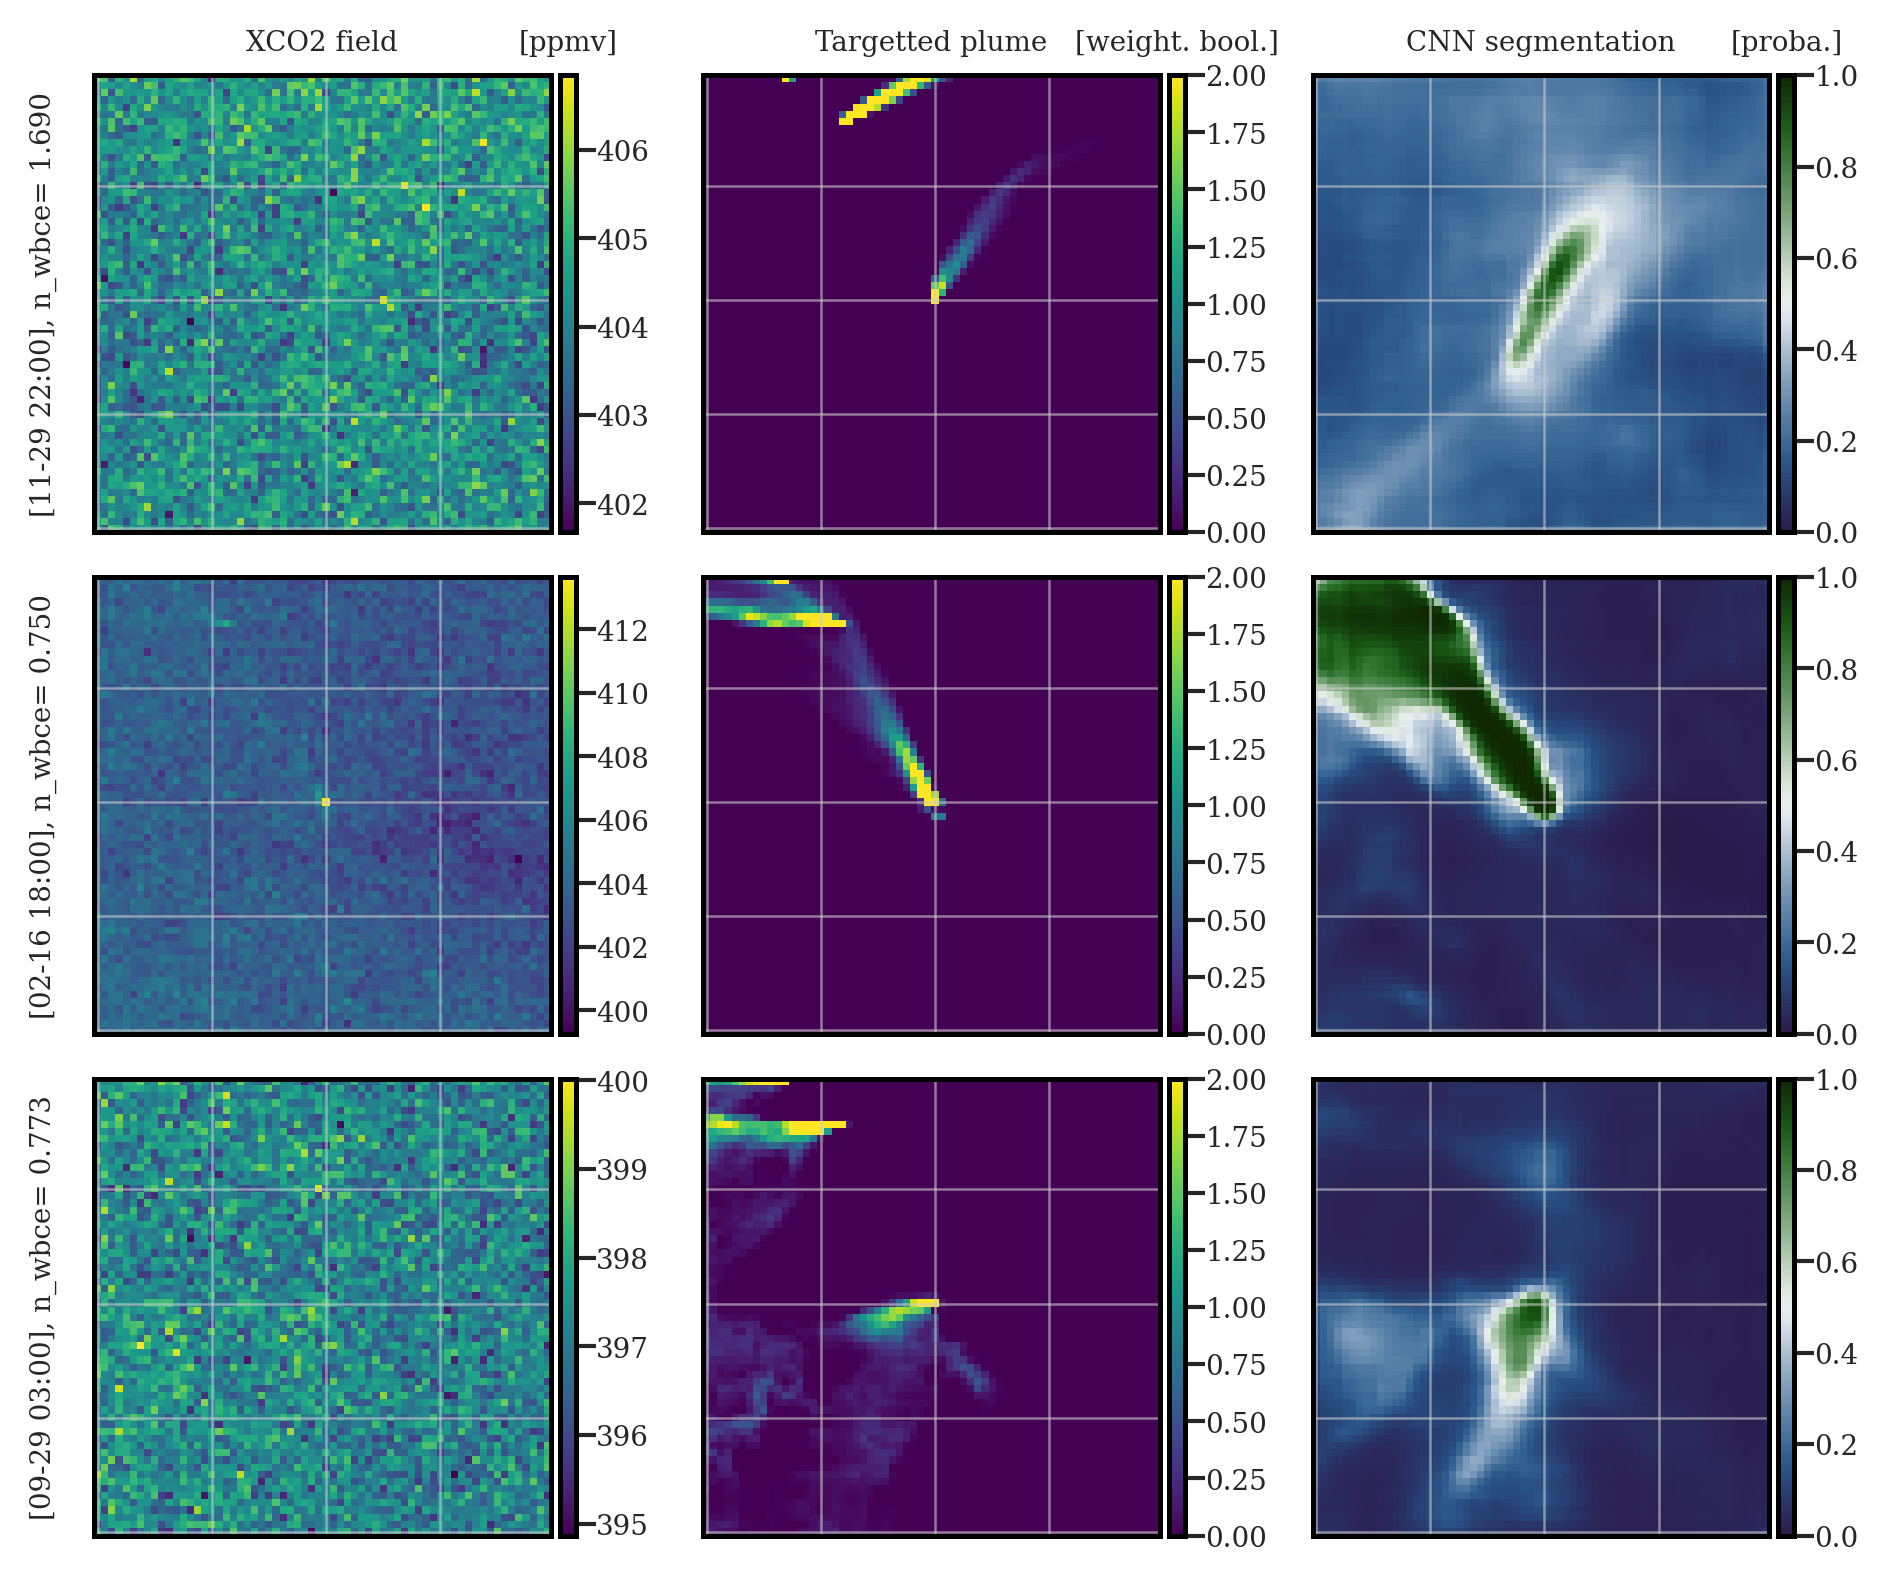

In [33]:
model_eval.plot_segmentation_examples(data, nwbce, model, no2=False)